<a href="https://colab.research.google.com/github/rahmadr2612/AnalisaKankerParu-Paru/blob/main/Analisa_kanker_paru_paru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data'
data = pd.read_csv(url,header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
data.columns = ['Class', 'fitur 1', 'fitur 2', 'fitur 3', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9',
              'fitur 10', 'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17', 'fitur 18', 'fitur 19',
              'fitur 20', 'fitur 21', 'fitur 22', 'fitur 23', 'fitur 24', 'fitur 25', 'fitur 26', 'fitur 27', 'fitur 28', 'fitur 29',
              'fitur 30', 'fitur 31', 'fitur 32', 'fitur 33', 'fitur 34', 'fitur 35', 'fitur 36', 'fitur 37', 'fitur 38', 'fitur 39',
              'fitur 40', 'fitur 41', 'fitur 42', 'fitur 43', 'fitur 44', 'fitur 45', 'fitur 46', 'fitur 47', 'fitur 48', 'fitur 49',
              'fitur 50', 'fitur 51', 'fitur 52', 'fitur 53', 'fitur 54', 'fitur 55', 'fitur 56']

data.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 47,fitur 48,fitur 49,fitur 50,fitur 51,fitur 52,fitur 53,fitur 54,fitur 55,fitur 56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
print(data.shape)

(32, 57)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     32 non-null     int64 
 1   fitur 1   32 non-null     int64 
 2   fitur 2   32 non-null     int64 
 3   fitur 3   32 non-null     int64 
 4   fitur 4   32 non-null     object
 5   fitur 5   32 non-null     int64 
 6   fitur 6   32 non-null     int64 
 7   fitur 7   32 non-null     int64 
 8   fitur 8   32 non-null     int64 
 9   fitur 9   32 non-null     int64 
 10  fitur 10  32 non-null     int64 
 11  fitur 11  32 non-null     int64 
 12  fitur 12  32 non-null     int64 
 13  fitur 13  32 non-null     int64 
 14  fitur 14  32 non-null     int64 
 15  fitur 15  32 non-null     int64 
 16  fitur 16  32 non-null     int64 
 17  fitur 17  32 non-null     int64 
 18  fitur 18  32 non-null     int64 
 19  fitur 19  32 non-null     int64 
 20  fitur 20  32 non-null     int64 
 21  fitur 21  32 non-n

In [ ]:
data['Class'].unique()

array([1, 2, 3])

In [ ]:
data['Class'].value_counts()

2    13
3    10
1     9
Name: Class, dtype: int64

Text(0.5, 1.02, 'Distribusi Penderita Penyakit Kanker Paru-Paru')

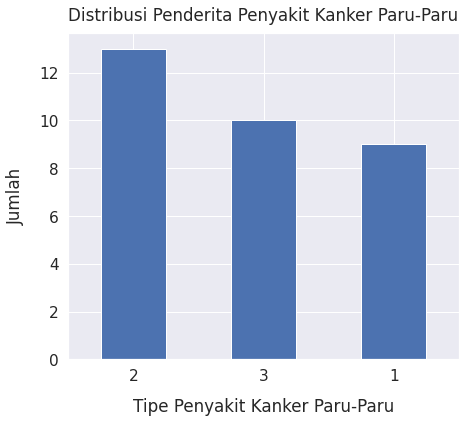

In [ ]:
sns.set(font_scale=1.4)
data['Class'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Tipe Penyakit Kanker Paru-Paru", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Kanker Paru-Paru", y=1.02)

In [ ]:
data.describe()

,Class,fitur 1,fitur 2,fitur 3,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 47,fitur 48,fitur 49,fitur 50,fitur 51,fitur 52,fitur 53,fitur 54,fitur 55,fitur 56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [ ]:
data.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 47,fitur 48,fitur 49,fitur 50,fitur 51,fitur 52,fitur 53,fitur 54,fitur 55,fitur 56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
data.replace("?", np.nan, inplace=True)

In [ ]:
data.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 47,fitur 48,fitur 49,fitur 50,fitur 51,fitur 52,fitur 53,fitur 54,fitur 55,fitur 56
0,1,0,3,0,NaN,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [ ]:
data.isnull().values.any()

True

In [ ]:
data.loc[:, data.isnull().any()].columns

Index(['fitur 4', 'fitur 38'], dtype='object')

In [ ]:
data[['fitur 4', 'fitur 38']]

,fitur 4,fitur 38
0,NaN,2
1,1,1
2,2,2
3,2,2
4,1,1
5,2,1
6,1,2
7,1,1
8,1,2
9,2,2


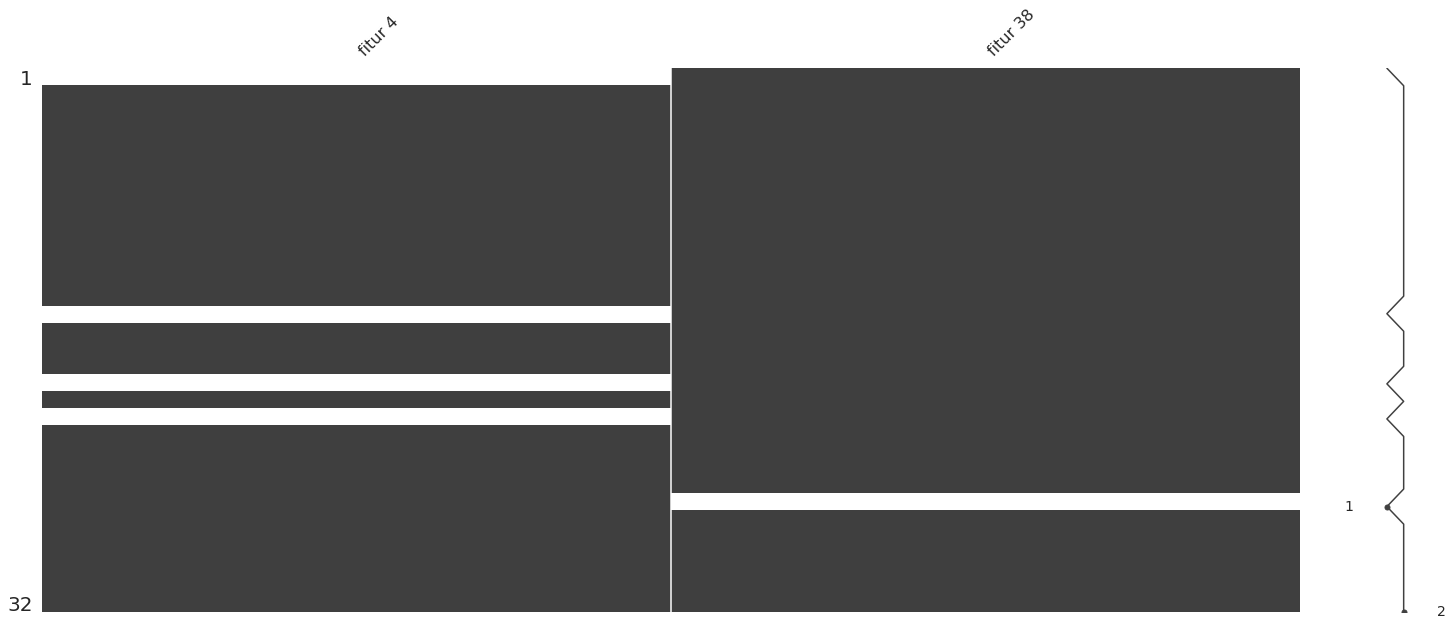

In [ ]:
missingdata_data = data.columns[data.isnull().any()].tolist()
missingno.matrix(data[missingdata_data])

In [ ]:
median_value = data['fitur 4'].median()
data['fitur 4']=data['fitur 4'].fillna(median_value)

median_value = data['fitur 38'].median()
data['fitur 38']=data['fitur 38'].fillna(median_value)

In [ ]:
data.loc[:, list(data.loc[:, data.isnull().any()].columns)].isnull().sum()/(len(data))*100

Series([], dtype: float64)

In [ ]:
data.shape

(32, 57)

In [ ]:
data = data.drop_duplicates()
data.shape

(32, 57)

In [ ]:
data = data.loc[:, data.apply(pd.Series.nunique) !=1]
data.shape

(32, 57)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     32 non-null     int64 
 1   fitur 1   32 non-null     int64 
 2   fitur 2   32 non-null     int64 
 3   fitur 3   32 non-null     int64 
 4   fitur 4   32 non-null     object
 5   fitur 5   32 non-null     int64 
 6   fitur 6   32 non-null     int64 
 7   fitur 7   32 non-null     int64 
 8   fitur 8   32 non-null     int64 
 9   fitur 9   32 non-null     int64 
 10  fitur 10  32 non-null     int64 
 11  fitur 11  32 non-null     int64 
 12  fitur 12  32 non-null     int64 
 13  fitur 13  32 non-null     int64 
 14  fitur 14  32 non-null     int64 
 15  fitur 15  32 non-null     int64 
 16  fitur 16  32 non-null     int64 
 17  fitur 17  32 non-null     int64 
 18  fitur 18  32 non-null     int64 
 19  fitur 19  32 non-null     int64 
 20  fitur 20  32 non-null     int64 
 21  fitur 21  32 non-n

In [ ]:
data["fitur 38"] = data["fitur 38"].astype('int64')
data["fitur 4"] = data["fitur 4"].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Class     32 non-null     int64
 1   fitur 1   32 non-null     int64
 2   fitur 2   32 non-null     int64
 3   fitur 3   32 non-null     int64
 4   fitur 4   32 non-null     int64
 5   fitur 5   32 non-null     int64
 6   fitur 6   32 non-null     int64
 7   fitur 7   32 non-null     int64
 8   fitur 8   32 non-null     int64
 9   fitur 9   32 non-null     int64
 10  fitur 10  32 non-null     int64
 11  fitur 11  32 non-null     int64
 12  fitur 12  32 non-null     int64
 13  fitur 13  32 non-null     int64
 14  fitur 14  32 non-null     int64
 15  fitur 15  32 non-null     int64
 16  fitur 16  32 non-null     int64
 17  fitur 17  32 non-null     int64
 18  fitur 18  32 non-null     int64
 19  fitur 19  32 non-null     int64
 20  fitur 20  32 non-null     int64
 21  fitur 21  32 non-null     int64
 22  fitu

In [ ]:
x = data.iloc[:,1:57]
y = data['Class']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2022)

In [ ]:
x_train.head()

,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 47,fitur 48,fitur 49,fitur 50,fitur 51,fitur 52,fitur 53,fitur 54,fitur 55,fitur 56
10,0,2,2,0,0,3,2,3,1,1,...,2,2,2,2,2,2,2,2,2,2
15,0,3,2,2,1,2,2,2,1,1,...,2,2,2,2,2,2,2,2,2,2
26,0,2,2,2,0,2,1,2,1,1,...,2,2,2,2,2,2,2,1,2,1
6,0,3,2,1,0,3,3,3,1,2,...,2,2,2,2,1,2,2,2,1,2
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
x_norm = StandardScaler().fit_transform(x)

In [ ]:
x_norm

array([[-0.1796053 ,  1.14707867, -2.00118448, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 ,  1.14707867,  0.95441106, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 ,  1.14707867,  0.95441106, ...,  0.8819171 ,
        -2.081666  ,  0.62554324],
       ...,
       [-0.1796053 , -0.6882472 , -1.01598597, ...,  0.8819171 ,
         0.48038446, -1.59861051],
       [-0.1796053 , -0.6882472 ,  0.95441106, ..., -1.13389342,
         0.48038446,  0.62554324],
       [-0.1796053 , -0.6882472 ,  0.95441106, ...,  0.8819171 ,
         0.48038446,  0.62554324]])

In [ ]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm,y, test_size=0.3, random_state=2022)

In [ ]:
pca = PCA(random_state=2022)
pca.fit(x)
ori_pca_array = pca.transform(x)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:" ,sv)

Heads of Original_PCA:          0         1         2         3         4         5         6   \
0 -1.057646  2.260422 -1.985713 -0.023184 -0.771633 -0.695836  0.125112   
1 -2.031824  1.281974  1.597589 -1.688171  0.754078  0.411962  0.874224   
2 -1.601070 -1.522187  0.904781  0.490203 -0.237550 -1.095035 -1.915412   
3 -0.841556 -1.738084  0.484309  2.097076  1.255459 -1.088126 -1.547277   
4 -1.464877  0.901017  1.088615  0.745350  1.286815  1.848524  0.612184   

         7         8         9   ...        22        23        24        25  \
0 -0.905445  0.047716  0.917133  ... -0.428479  0.279299 -0.337633 -0.071038   
1  0.978529 -0.735173  0.922356  ...  0.684697  0.374345 -0.275613  0.235054   
2  0.810770 -0.881391 -0.402055  ...  0.282514 -0.292853 -0.377844 -0.128548   
3  0.459730  0.186126 -0.014296  ...  0.096951  0.030326  0.369293 -0.492249   
4 -0.359838  0.014906  0.601446  ...  0.014950  0.401673  0.375134 -0.050496   

         26        27        28        29    

In [ ]:
cum_var_ratio = np.cumsum(var_ratio)

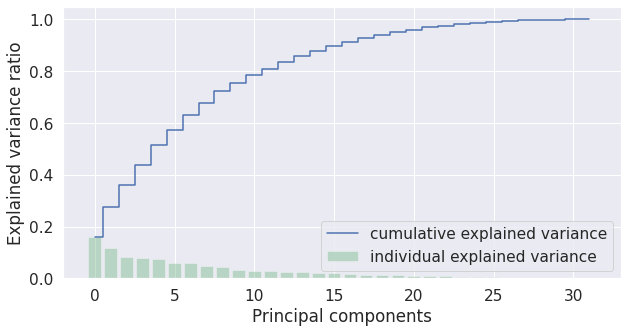

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
          var_ratio,
          alpha=0.3333,
          align='center',
          label='individual explained variance',
          color = 'g')
plt.step(range(len(cum_var_ratio)),
          cum_var_ratio,
          where='mid',
          label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
print("Cumulative explained ratio:",cum_var_ratio)

Cumulative explained ratio: [0.15934082 0.27488602 0.35861016 0.43858322 0.51345845 0.57375362
 0.63150817 0.67852622 0.72231158 0.75526378 0.78375031 0.81045975
 0.83410366 0.85690149 0.87763253 0.89707697 0.91413281 0.92768103
 0.93985221 0.9509827  0.96074279 0.96910631 0.97641367 0.982464
 0.98726226 0.99107118 0.99385427 0.99643944 0.99818263 0.99929884
 1.         1.        ]


In [ ]:
pca = PCA(n_components=18, random_state=2022)
pca.fit(x)
ori_pca_array = pca.transform(x)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

In [ ]:
pca = PCA(random_state=2022)
pca.fit(x_norm)
norm_pca_array = pca.transform(x_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -1.875112 -1.074126 -3.114162 -0.202740 -1.578644  0.472907 -0.306629   
1 -2.228485 -3.085196 -0.355241  0.321562  0.962612  1.183493  1.933027   
2 -2.045345 -0.560281  2.529009  1.166134 -1.090708 -2.418340 -2.856828   
3 -1.232962  0.268831  1.314142 -1.177625  0.699316 -4.038767 -1.566536   
4 -1.185845 -1.218255  0.987464 -2.566320  0.910664  0.388925  1.540951   

         7         8         9   ...        22        23        24        25  \
0  0.744336  0.034727  0.193626  ...  0.801308 -0.131015 -0.279103 -0.296633   
1 -2.332710 -1.001260  0.199715  ...  1.362424 -0.451698 -0.856956  0.210401   
2 -1.527885 -0.540103 -1.621999  ...  0.367649  0.574592 -0.423554  0.428521   
3  1.393874  0.537139  1.077903  ...  0.977745 -0.977776  0.341032  0.467428   
4 -1.405633  0.411415  2.363635  ... -0.411097 -1.176693 -0.084704 -0.818883   

         26        27        28        29        

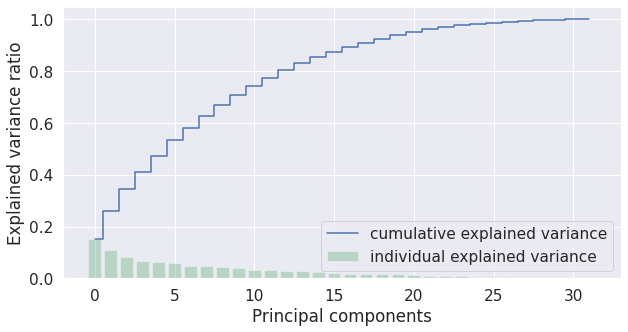

Cumulative explained ratio: [0.1535552  0.26122328 0.34394082 0.41070078 0.473153   0.5327475
 0.58156557 0.6277977  0.66976358 0.7092963  0.74218264 0.77309676
 0.80315311 0.83061478 0.85338857 0.87409626 0.89246191 0.90980393
 0.92587992 0.94098776 0.95339462 0.96261989 0.97051216 0.97757267
 0.98308898 0.98764383 0.99180414 0.99482533 0.99711414 0.9988593
 1.         1.        ]


In [ ]:
cum_var_ratio = np.cumsum(var_ratio)
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
var_ratio,
alpha=0.3333,
align='center',
label='individual explained variance',
color = 'g')
plt.step(range(len(cum_var_ratio)),
cum_var_ratio,
where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
pca = PCA(n_components=18, random_state=2022)
pca.fit(x_norm)
norm_pca_array = pca.transform(x_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

In [ ]:
parameters_dt = {
"model__max_depth": np.arange(1,21),
"model__min_samples_leaf": np.arange(1,101,2),
"model__min_samples_split": np.arange(2,11),
"model__criterion": ['gini','entropy'],
"model__random_state": [2022]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
('model',DecisionTreeClassifier()),
])

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
ori_classifier_dt.fit(x_train,y_train.ravel())
ori_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_classifier_dt.fit(x_train_norm,y_train_norm.ravel())
norm_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))


model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())
ori_pca_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())
norm_pca_classifier_dt.best_estimator_
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))


model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(x_train)
ori_accuracy_dt_train = accuracy_score(y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = ori_classifier_dt.predict(x_test)
ori_accuracy_dt_test = accuracy_score(y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.5
Precision pada test set:  0.5
Recall pada test set:  0.5


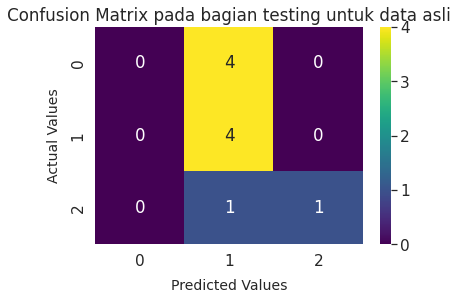

In [ ]:
sns.heatmap(confusion_matrix(y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(x_train_norm)
norm_accuracy_dt_train = accuracy_score(y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)
norm_precision_dt_train = precision_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)
norm_recall_dt_train = recall_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)
norm_y_pred_dt_test = norm_classifier_dt.predict(x_test_norm)
norm_accuracy_dt_test = accuracy_score(y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)
norm_precision_dt_test = precision_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)
norm_recall_dt_test = recall_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.5
Precision pada test set:  0.5
Recall pada test set:  0.5


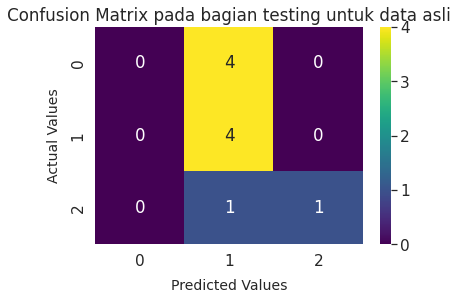

In [ ]:
sns.heatmap(confusion_matrix(y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)
ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)
ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)
ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)
ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)
ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)
ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)
ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.6363636363636364
Precision pada training set:  0.6363636363636364
Recall pada training set:  0.6363636363636364
Akurasi pada test set:  0.4
Precision pada test set:  0.4
Recall pada test set:  0.4


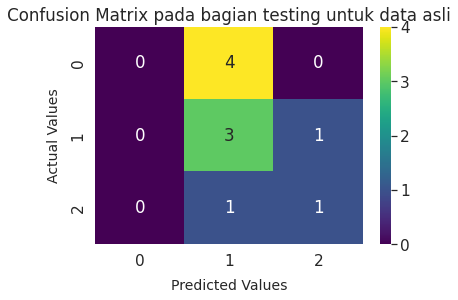

In [ ]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)
norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)
norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)
norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)
norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)
norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)
norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)


Akurasi pada training set:  0.9090909090909091
Precision pada training set:  0.9090909090909091
Recall pada training set:  0.9090909090909091
Akurasi pada test set:  0.6
Precision pada test set:  0.6
Recall pada test set:  0.6


In [ ]:
models = [
('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
]
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.636364,0.5
1,Decision Tree Data Normalisasi,0.636364,0.5
2,Decision Tree PCA Data Original,0.636364,0.4
3,Decision Tree PCA Data Normalisasi,0.909091,0.6


In [ ]:
models_comparison = [
('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.5,0.5,0.5
1,Decision Tree Data Normalisasi,0.5,0.5,0.5
2,Decision Tree PCA Data Original,0.4,0.4,0.4
3,Decision Tree PCA Data Normalisasi,0.6,0.6,0.6


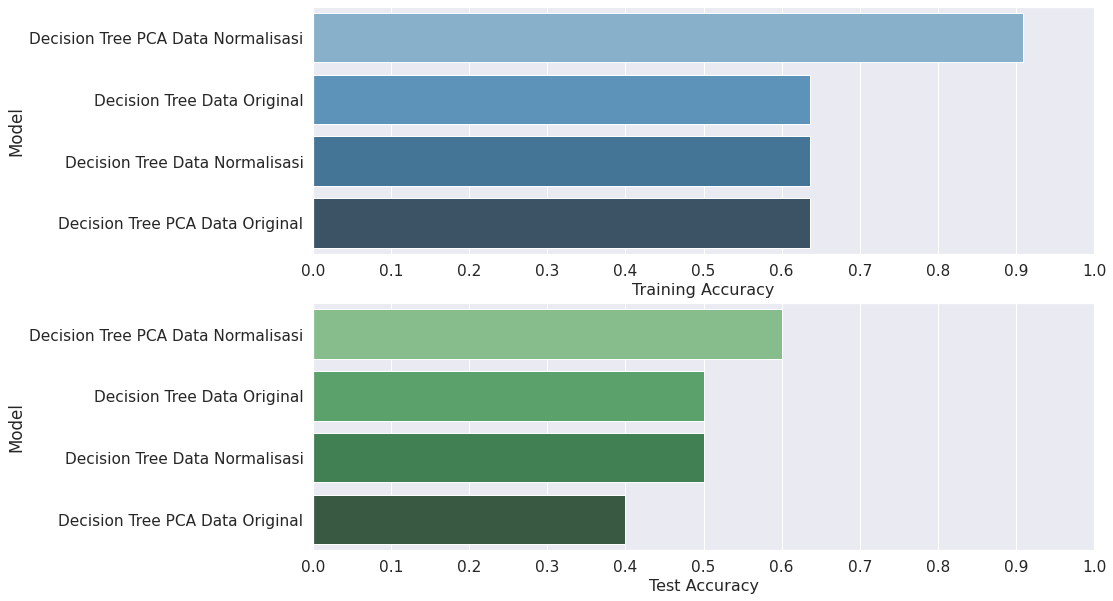

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [ ]:
print("COPAS TOK MASA ERROR CK CK CK")

COPAS TOK MASA ERROR CK CK CK
